In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Loan_default_Dataset.csv")

In [3]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [47]:
#Get num of cols and rows
df.shape

(255347, 18)

In [51]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [55]:
# Analyzing missing values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [59]:
cols = df.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is a classification problem and the target variable is categorical

cols.append('Default')

In [61]:
cols

['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner',
 'Default']

In [65]:
# Changing the data type of object type column to category.

for i in cols:
    df[i] = df[i].astype("category")

In [69]:
# Checking the info again and the datatype of different variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  category
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

In [71]:
# Analyzing the summary statistics for numerical variables
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm']
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.0,43.0,56.0,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.5,82466.0,116219.0,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.0,127556.0,188985.0,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.0,574.0,712.0,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.0,60.0,90.0,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.0,2.0,3.0,4.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.0,36.0,48.0,60.0


In [73]:
# Checking summary for categorical data
df.describe(include=['category']).T

,count,unique,top,freq
LoanID,255347,255347,0003HW9UAA,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701
Default,255347,2,0,225694


In [79]:
# Insights
#  The "Default" column represents whether a client defaulted (value is 1) or did not defaulted (value 0) and has a frequency of 88%. 
# This means the other 12% of clients have defaulted at least once.
# The "Loan Purpose" column represents the reason for obtaining loan and the high frequency points that loans given to "business" purpose is the most common reason.

In [77]:
# Checking the count of unique values in each categorical column
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts(normalize = True))
    print('*'*40)

Unique values in LoanID are :
LoanID
0003HW9UAA    0.000004
O16Y9AYUZ9    0.000004
O13IX6QF0B    0.000004
O13Q69VJQU    0.000004
O13RJ9I0LN    0.000004
                ...   
C0K5NIGGKZ    0.000004
C0K888SPGB    0.000004
C0KN60Z9UV    0.000004
C0KO1RFMJP    0.000004
ZZZX015LV2    0.000004
Name: proportion, Length: 255347, dtype: float64
****************************************
Unique values in Education are :
Education
Bachelor's     0.252073
High School    0.250259
Master's       0.248842
PhD            0.248826
Name: proportion, dtype: float64
****************************************
Unique values in EmploymentType are :
EmploymentType
Part-time        0.251270
Unemployed       0.249950
Self-employed    0.249488
Full-time        0.249292
Name: proportion, dtype: float64
****************************************
Unique values in MaritalStatus are :
MaritalStatus
Married     0.334063
Divorced    0.333010
Single      0.332927
Name: proportion, dtype: float64
*****************************

In [81]:
#Insights from above data information
# 88% of client are non defaulted. 12% of them are defaulted.
# There are 4 employment types and each type has got loan equally at around 25%
# Loans are got mostly for business purpose (20%) and for home loans (20%). Education loan, Auto Loan & Other loans are also little less than 20%

In [95]:
# How many defaulters
perc_default = df['Default'].value_counts() / len(df['Default'])
print(f'The percentage of defaulters in the data: {perc_default*100} %')

The percentage of defaulters in the data: Default
0    88.387175
1    11.612825
Name: count, dtype: float64 %


[]

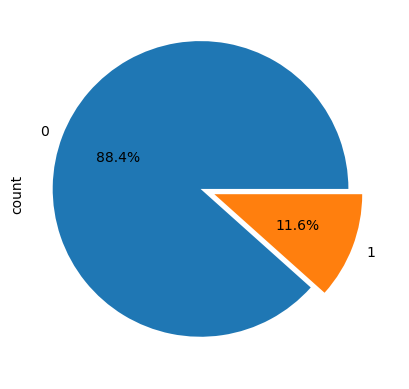

In [97]:
df['Default'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()
# Observations: 12% of the clients in the dataset are defaulter on their loans (Default=1) and 80% of the clients have successfully repaid their loans or are not defaulter (Default=0).

In [105]:
def show_value_counts(col):
    print(col)
    value_counts = df[col].value_counts()
    percentage = value_counts / len(df) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)

In [107]:
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 5))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

LoanPurpose
                 Value  Count  Percentage
LoanPurpose                              
Auto              Auto  50844   19.911728
Business      Business  51298   20.089525
Education    Education  51005   19.974779
Home              Home  51286   20.084826
Other            Other  50914   19.939142
--------------------------


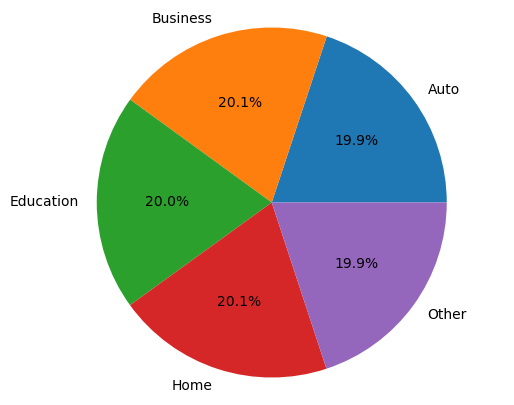

In [109]:
#The unique categories in the Loan Purpose variable
show_value_counts('LoanPurpose')

EmploymentType
                        Value  Count  Percentage
EmploymentType                                  
Full-time           Full-time  63656   24.929214
Part-time           Part-time  64161   25.126984
Self-employed   Self-employed  63706   24.948795
Unemployed         Unemployed  63824   24.995007
--------------------------


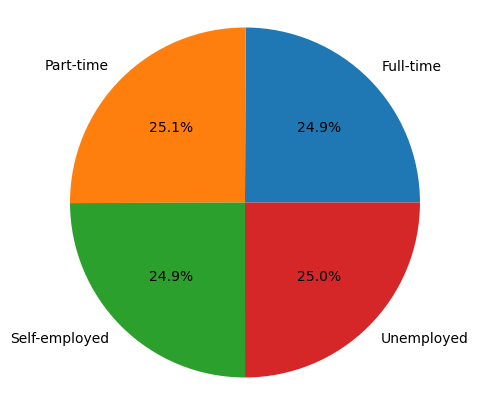

In [111]:
#The unique categories in the Employment Type variable
show_value_counts('EmploymentType')

MaritalStatus
                  Value  Count  Percentage
MaritalStatus                             
Divorced       Divorced  85033   33.300959
Married         Married  85302   33.406306
Single           Single  85012   33.292735
--------------------------


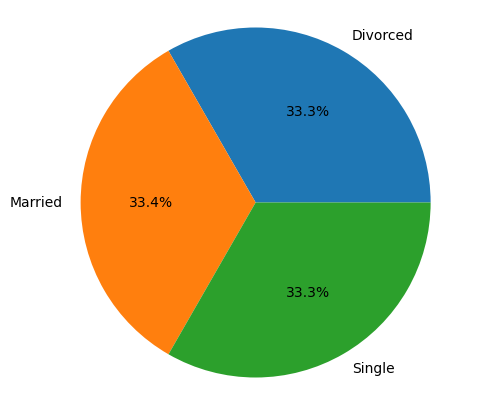

In [113]:
#The unique categories in the MaritalStatus variable
show_value_counts('MaritalStatus')

Age
Skew : 0.0


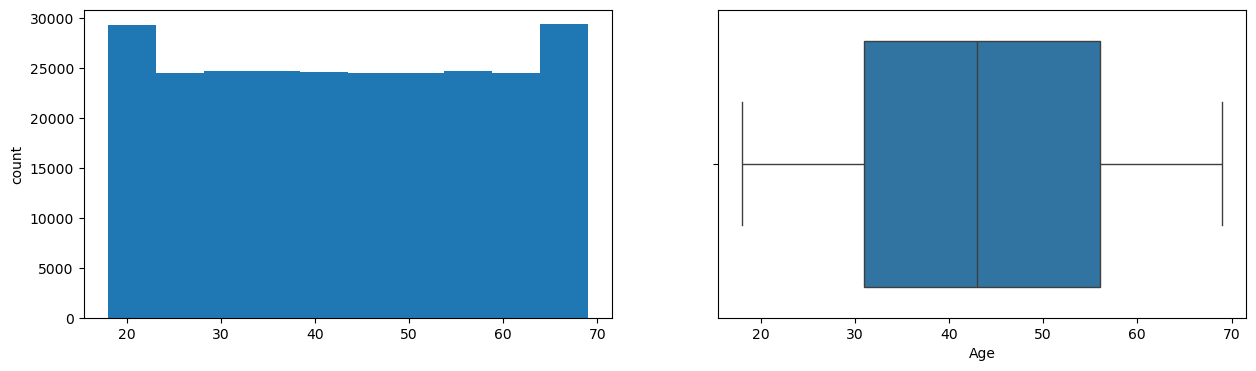

Income
Skew : -0.0


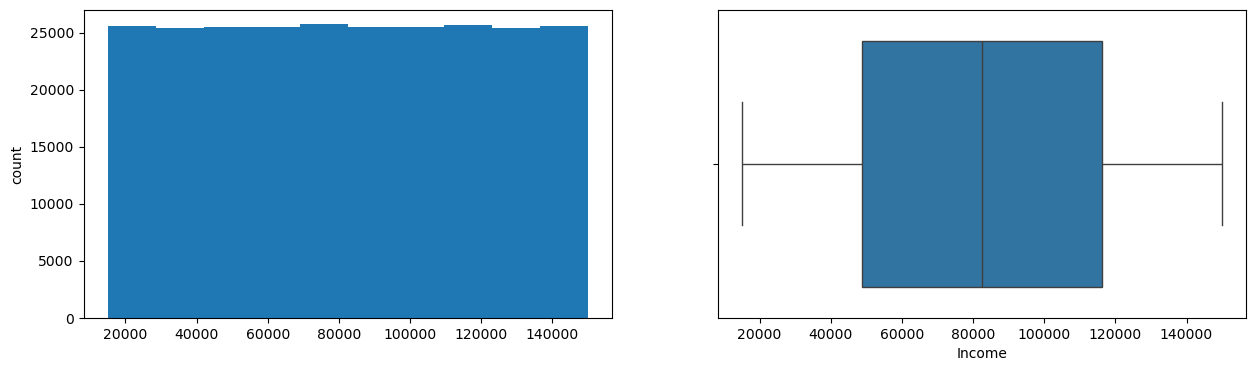

LoanAmount
Skew : -0.0


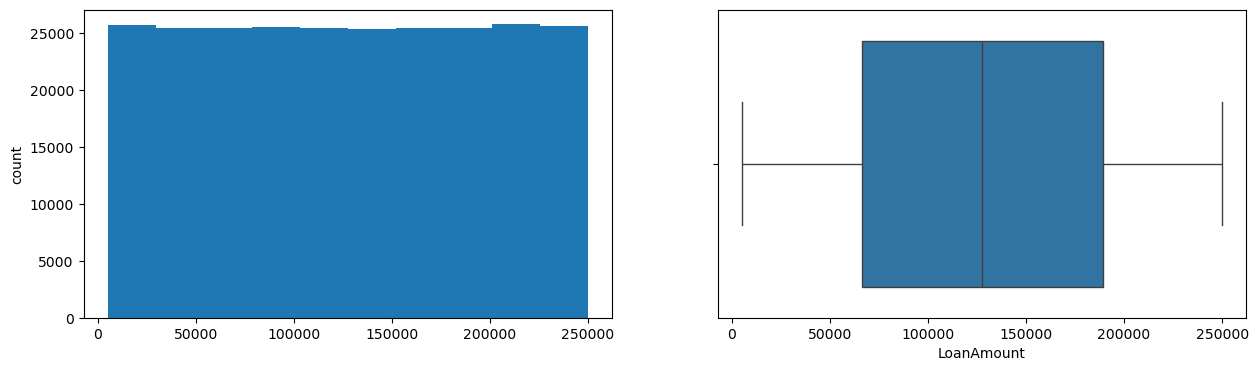

CreditScore
Skew : 0.0


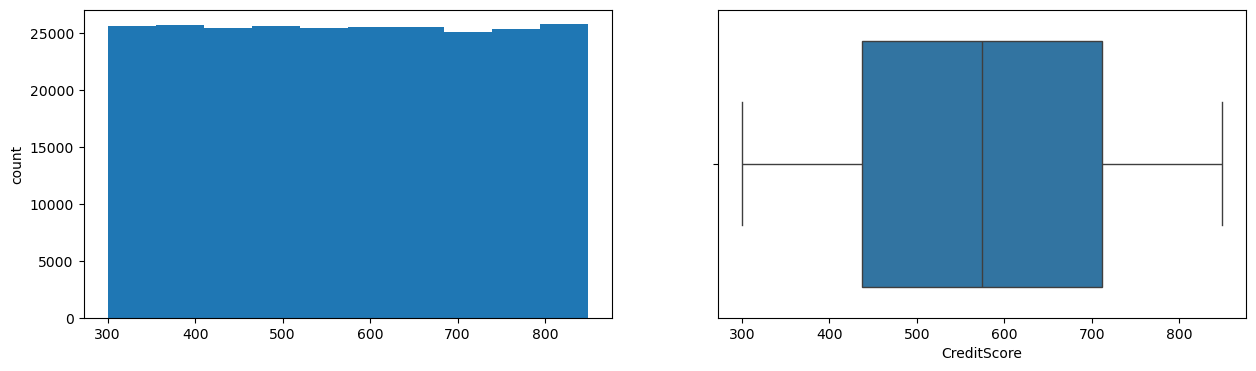

MonthsEmployed
Skew : -0.0


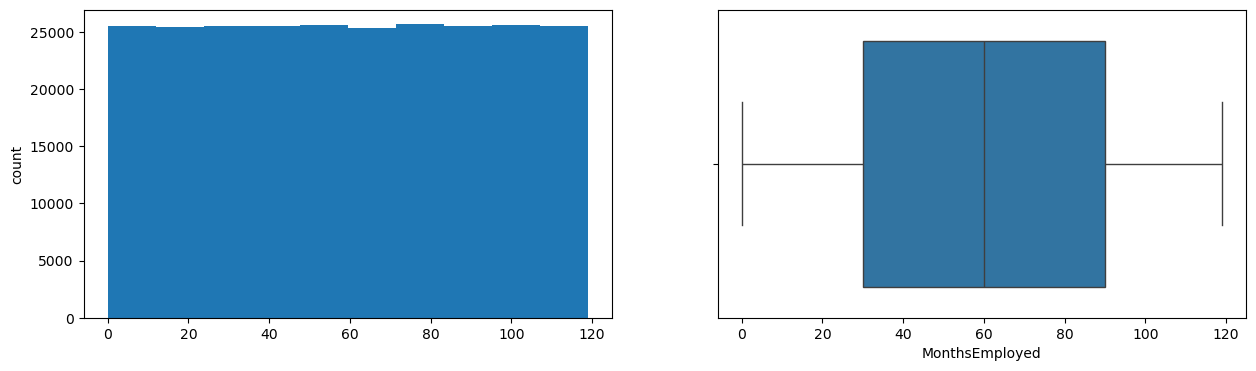

NumCreditLines
Skew : -0.0


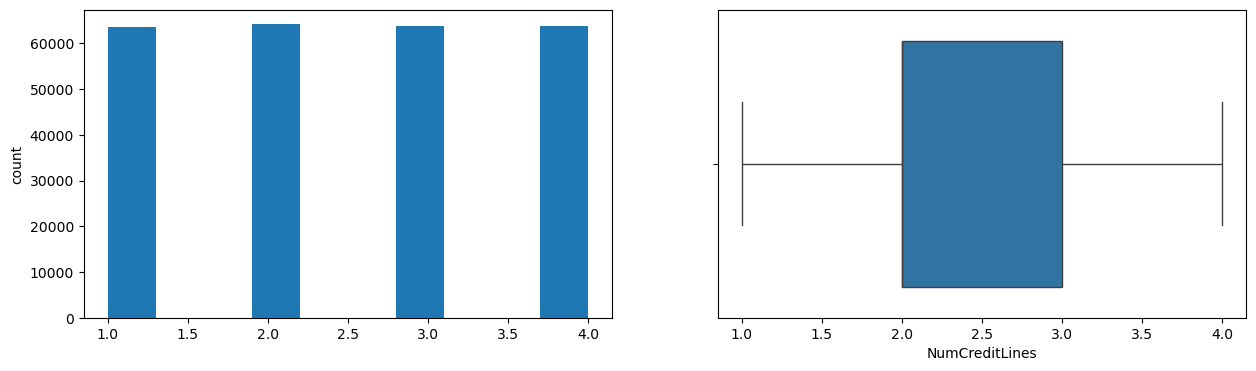

LoanTerm
Skew : -0.0


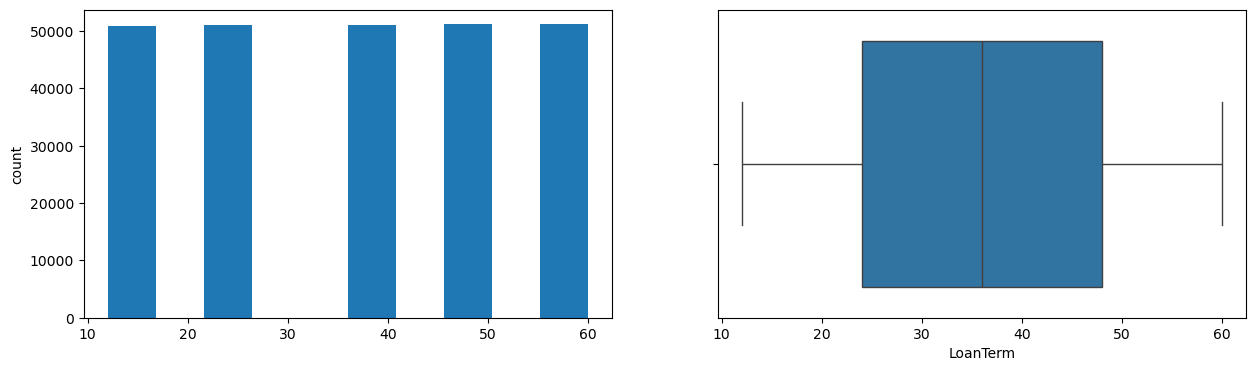

In [115]:
#histogram and boxplot of numerical variables
for feature in num_cols:
    print(feature)
    print('Skew :',round(df[feature].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[feature].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[feature])
    plt.show()

<Axes: xlabel='Default', ylabel='LoanAmount'>

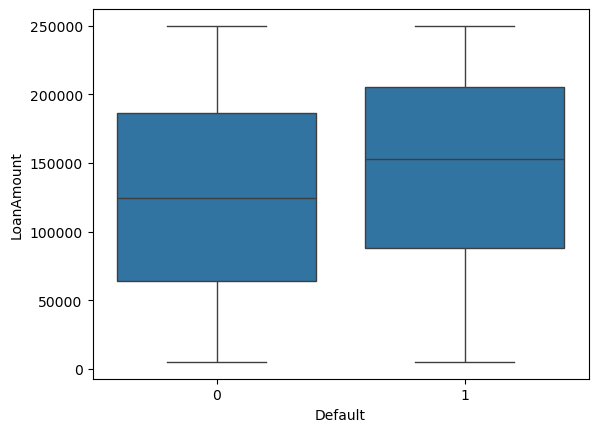

In [121]:
#Analyze Default vs LoanAmount
sns.boxplot(x=df["Default"],y=df['LoanAmount'])
# Observation: The defaulted clients have got higher loan amount than those who has not defaulted.

<Axes: xlabel='Default', ylabel='LoanTerm'>

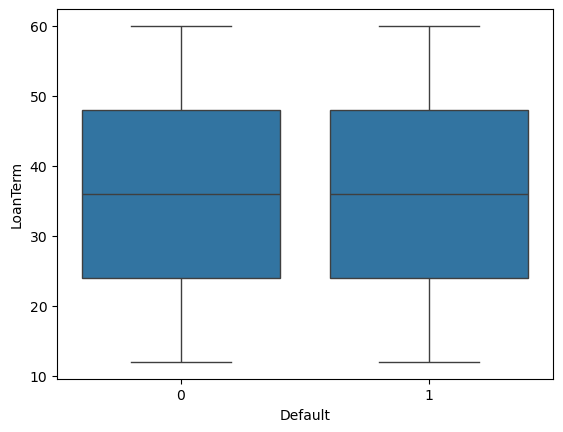

In [125]:
#Analyze Default vs LoanTerm
sns.boxplot(x=df["Default"],y=df['LoanTerm'])
# Observation: Both type of client (defaulted or not) have the same term for Loan